In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,1
1,Bronchus,MaxDose,3480,0.00,NaN,1
2,Chestwall_L,MaxDvh,3000,2.04,NaN,1
3,D2cm,MaxDose,2400,0.00,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'Result': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'Result', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,Result,PercentChange
0,Bronchus,MaxDvh,1560.0,952.054084,-38.970892
1,Bronchus,MaxDose,3480.0,2256.140869,-35.168366
2,Chestwall_L,MaxDvh,3000.0,2025.755821,-32.474806
3,D2cm,MaxDose,2400.0,3082.279053,28.428294
4,Esophagus,MaxDvh,1880.0,705.366400,-62.480511
5,Esophagus,MaxDose,3000.0,1180.661743,-60.644609
6,GreatVes,MaxDvh,4300.0,1177.725435,-72.611036
7,GreatVes,MaxDose,4900.0,1675.983032,-65.796265
8,Heart,MaxDvh,2800.0,897.491022,-67.946749
9,Heart,MaxDose,3400.0,1515.074951,-55.438972


In [7]:
# Output constituent function specifications
func_df = pd.read_csv('funcs.csv')
func_df['DoseLevel'] = func_df['DoseLevel'].astype(str)
for index, row in result.func_df.iterrows():
    if row['Roi'] != 'PTV':
        value = result.goal_dict[index][0]
        func_df.at[index, 'DoseLevel'] = f'[0, {value:.2f}]'
func_df.to_csv('funcs2.csv')
func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[0, 952.05]",18.52,NaN,1
1,Bronchus,MaxDose,"[0, 2256.14]",0.00,NaN,1
2,Chestwall_L,MaxDvh,"[0, 2025.76]",2.04,NaN,1
3,D2cm,MaxDose,"[0, 3082.28]",0.00,NaN,1
4,Esophagus,MaxDvh,"[0, 705.37]",16.91,NaN,1
5,Esophagus,MaxDose,"[0, 1180.66]",0.00,NaN,1
6,GreatVes,MaxDvh,"[0, 1177.73]",5.66,NaN,1
7,GreatVes,MaxDose,"[0, 1675.98]",0.00,NaN,1
8,Heart,MaxDvh,"[0, 897.49]",1.84,NaN,1
9,Heart,MaxDose,"[0, 1515.07]",0.00,NaN,1


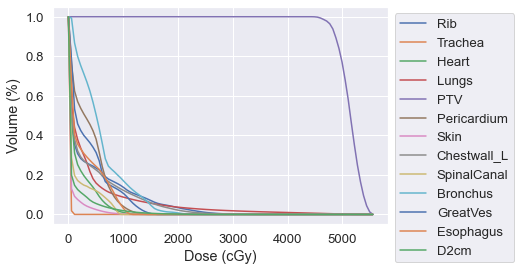

In [8]:
# Dose-volume histograms
result.dvhplot()